In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
# MNIST 예제
# 흑백 손글씨 숫자 이미지(28x28픽셀) / 10개의 범주(숫자 0~9)
# 이 이미지는 넘파이로 인코딩 되어 있고, 이미지와 레이블은 1대1 관계를 가진다.
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


In [3]:
train_images.shape  # 6만개의 데이터와 28x28 크기

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape  # 1만개의 데이터 이미지

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

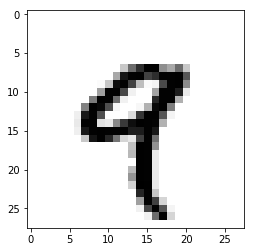

In [10]:
# 5번째 샘플을 맷플롯립 통해 확인해보기

import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [11]:
# 훈련 데이터인 train_images와 train_labels를 딥러닝 모델(layer)에 주입한다.

from keras.models import Sequential
from keras.layers import Dense

network = Sequential()
network.add(Dense(512, activation='relu', input_shape=(28*28, )))
network.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# 학습 모델 준비 단계 중 컴파일 단계에서는 아래 3가지 파라미터가 필요하다.

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# 학습 시작 전에, MNIST의 데이터 형태(0부터 255사이의 값을 가진 uint8타입의 배열)를 
# 0과1 사이의 float32 타입의 배열 크기는 같은 배열로 바꾼다.

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

# 28X28 의 2차원 이미지 데이터가 6만개로 채워진 3차원 배열이 reshape을 통해 (60000,784)의 2차원 데이터로
# 실수형의 데이터로 변환된 값을 255라는 최대값으로 나눠 주면서 0과 1사이의 실수형 데이터로 변환.

In [17]:
import numpy as np

a = np.array([[[0,0,0],[0,0,0]], [[12,12,12],[12,12,12]]])

print(a.shape)

a = a.reshape(2, 2*3)

print(a, a.shape)

(2, 2, 3)
[[ 0  0  0  0  0  0]
 [12 12 12 12 12 12]] (2, 6)


In [19]:
a = a.astype('float32')
print(a)

[[ 0.  0.  0.  0.  0.  0.]
 [12. 12. 12. 12. 12. 12.]]


In [21]:
# 레이블을 범주형으로 인코딩
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)
# 훈련(fit) 과정 동안, 훈련 데이터에 대한 손실과 정확도의 두개의 정보가 출력 된다.

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.2553 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.1044 - acc: 0.9685 0s - loss: 0.1044 - acc: 0
Epoch 3/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.0677 - acc: 0.9798 1s - loss: 
Epoch 4/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0496 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0367 - acc: 0.9892


In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 107us/step


In [24]:
print('test_acc : ', test_acc)

test_acc :  0.98
